In [8]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10 as data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import random
from tensorflow.keras.layers import BatchNormalization, Dropout

In [9]:
import pandas as pd
#immport data

data_frame = pd.read_excel("01train.xlsx")
y_data=data_frame['Underclocking']
x_data = data_frame.drop('Underclocking', axis=1)

In [10]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest=train_test_split(x_data, y_data,test_size=0.1, random_state=1)

In [11]:

import tensorflow as tf
l2_regularizer = tf.keras.regularizers.l2(0.001)
input_features = data_frame.shape[1] - 1
# 假设已经定义了模型 'model'
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_features,)), 
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),  
])
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 32)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,299 (5.07 KB)

 Trainable params: 1,299 (5.07 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',  # 对于二分类问题，使用binary_crossentropy
    metrics=['accuracy']
)

history = model.fit(Xtrain, ytrain, batch_size=5, epochs=50,validation_split=0.1 ) #default batch=32
print(history.history.keys())


Epoch 1/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 568us/step - accuracy: 0.5375 - loss: 5.8880 - val_accuracy: 0.6080 - val_loss: 0.6697
Epoch 2/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.5783 - loss: 0.6932 - val_accuracy: 0.6080 - val_loss: 0.6707
Epoch 3/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.5684 - loss: 0.7234 - val_accuracy: 0.6080 - val_loss: 0.6685
Epoch 4/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.5665 - loss: 0.6821 - val_accuracy: 0.6080 - val_loss: 0.6742
Epoch 5/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.5665 - loss: 0.6847 - val_accuracy: 0.6080 - val_loss: 0.6667
Epoch 6/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.5631 - loss: 0.6847 - val_accuracy: 0.6080 - val_loss: 0.6702
Epoch 7/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.5725 - loss: 0.6820 - val_accuracy: 0.6080 - val_loss: 0.6667
Epoch 8/50
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.5840 - loss: 0.6793 - 

In [13]:
results = model.evaluate(Xtest, ytest)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.5499 - loss: 0.6883
Final test set loss: 0.690128
Final test set accuracy: 0.542199


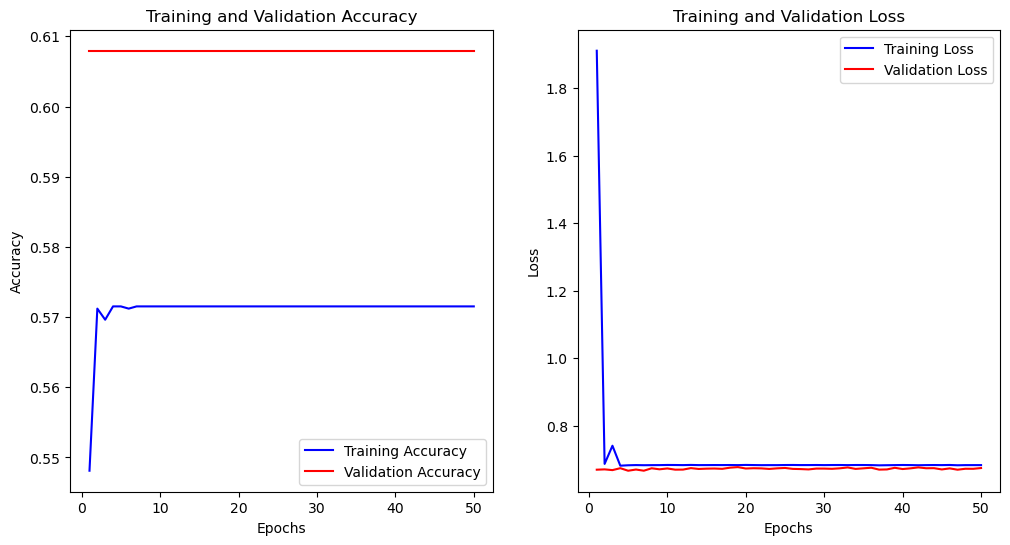

In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_ = range(1,len(acc)+1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_, acc, 'b-', label='Training Accuracy')
plt.plot(epochs_, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_, loss, 'b-', label='Training Loss')
plt.plot(epochs_, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()